# Proposed Model

In [ ]:
import torch
print(torch.cuda.is_available())  # True if GPU is available, False otherwise
print(torch.cuda.device_count())  # Number of GPUs available
print(torch.cuda.get_device_name(0))  # Name of the first GPU
print(torch.cuda.current_device)
# print("hello world")

### Imports

In [1]:

import torch
import csv
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import InterpolationMode
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torchvision.models as models
from torch.utils.data import DataLoader, Dataset,  Subset, random_split,  SubsetRandomSampler
from torchvision.datasets import ImageFolder
from sklearn.model_selection import train_test_split
from torchvision import datasets, models
from torchvision.models import ResNet50_Weights, Inception_V3_Weights
from tqdm import tqdm  # Import tqdm for progress bar
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import numpy as np
import os
import seaborn as sns
import random
import torchvision.transforms.functional as F
from PIL import Image
from Datapreprocess import DualTransformDataset_2,Applytransform_inception, Applytransform_resnet, AugmentedImageFolder_inception, AugmentedImageFolder_resnet, DualTransformDataset
from sklearn.utils import shuffle
from torchinfo import summary
from torchvision.models import inception_v3
from torch.optim import AdamW  # Import AdamW
save_dir = "./DATASETS/ECD NON AUGMENTED FULL"



## Plots

In [10]:
def plot_from_history(history):
    # Extract data from history
    epochs = history["epoch"]
    train_losses = history["train_loss"]
    val_losses = history["val_loss"]
    train_accuracies = history["train_accuracy"]
    val_accuracies = history["val_accuracy"]
    
    # Set global font sizes
    plt.rcParams.update({
        'font.size': 20,
        'axes.titlesize': 24,
        'axes.labelsize': 22,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 20
    })

    # Loss plot - separate figure
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, train_losses, label="Train Loss", color="blue", marker='o')
    plt.plot(epochs, val_losses, label="Validation Loss", color="red", marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig('loss_history.png')  # Uncomment to save
    plt.show()

    # Accuracy plot - separate figure
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, train_accuracies, label="Train Accuracy", color="blue", marker='o')
    plt.plot(epochs, val_accuracies, label="Validation Accuracy", color="red", marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig('accuracy_history.png')  # Uncomment to save
    plt.show()
    
def plot_from_history2(history1, history2, model1_name="Model 1", model2_name="Model 2"):
    # Extract data from histories
    epochs1 = history1["epoch"]
    train_losses1 = history1["train_loss"]
    val_losses1 = history1["val_loss"]
    train_accuracies1 = history1["train_accuracy"]
    val_accuracies1 = history1["val_accuracy"]
    
    epochs2 = history2["epoch"]
    train_losses2 = history2["train_loss"]
    val_losses2 = history2["val_loss"]
    train_accuracies2 = history2["train_accuracy"]
    val_accuracies2 = history2["val_accuracy"]
    
    # Set global font sizes
    plt.rcParams.update({
        'font.size': 20,
        'axes.titlesize': 24, 
        'axes.labelsize': 22,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'legend.fontsize': 20
    })

    # Loss plot - comparing both models
    plt.figure(figsize=(12, 10))
    plt.plot(epochs1, train_losses1, label=f"{model1_name} Train Loss", color="blue", marker='o', linestyle='-')
    plt.plot(epochs1, val_losses1, label=f"{model1_name} Val Loss", color="red", marker='o', linestyle='-')
    plt.plot(epochs2, train_losses2, label=f"{model2_name} Train Loss", color="green", marker='s', linestyle='--')
    plt.plot(epochs2, val_losses2, label=f"{model2_name} Val Loss", color="purple", marker='s', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Comparison")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig('loss_comparison.png')  # Uncomment to save
    plt.show()

    # Accuracy plot - comparing both models
    plt.figure(figsize=(12, 10))
    plt.plot(epochs1, train_accuracies1, label=f"{model1_name} Train Acc", color="blue", marker='o', linestyle='-')
    plt.plot(epochs1, val_accuracies1, label=f"{model1_name} Val Acc", color="red", marker='o', linestyle='-')
    plt.plot(epochs2, train_accuracies2, label=f"{model2_name} Train Acc", color="green", marker='s', linestyle='--')
    plt.plot(epochs2, val_accuracies2, label=f"{model2_name} Val Acc", color="purple", marker='s', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy Comparison")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig('accuracy_comparison.png')  # Uncomment to save
    plt.show()
def plot_from_history3(history1, history2, model1_name="Model 1", model2_name="Model 2", save_as="Filename"):
    # Extract data from histories
    epochs1 = history1["epoch"]
    train_losses1 = history1["train_loss"]
    val_losses1 = history1["val_loss"]
    train_accuracies1 = history1["train_accuracy"]
    val_accuracies1 = history1["val_accuracy"]
    
    epochs2 = history2["epoch"]
    train_losses2 = history2["train_loss"]
    val_losses2 = history2["val_loss"]
    train_accuracies2 = history2["train_accuracy"]
    val_accuracies2 = history2["val_accuracy"]
    
    # Set global font sizes
    plt.rcParams.update({
        'font.size': 24,
        'axes.titlesize': 28,
        'axes.labelsize': 26,
        'xtick.labelsize': 24,
        'ytick.labelsize': 24,
        'legend.fontsize': 24
    })

    # Define colors for consistency between plot lines and table
    colors = {
        'model1_train': 'blue',
        'model1_val': 'red',
        'model2_train': 'green',
        'model2_val': 'purple'
    }

    # Ensure we have same length data for both models or handle different lengths
    # Get unique epochs from both models
    all_epochs = sorted(list(set(epochs1).union(set(epochs2))))
    
    # Loss plot - comparing both models
    fig, ax_plot = plt.subplots(figsize=(14, 10))
    
    # Plot on the main plot
    ax_plot.plot(epochs1, train_losses1, label=f"{model1_name} Train Loss", color=colors['model1_train'], marker='o', linestyle='-')
    ax_plot.plot(epochs1, val_losses1, label=f"{model1_name} Val Loss", color=colors['model1_val'], marker='o', linestyle='-')
    ax_plot.plot(epochs2, train_losses2, label=f"{model2_name} Train Loss", color=colors['model2_train'], marker='s', linestyle='--')
    ax_plot.plot(epochs2, val_losses2, label=f"{model2_name} Val Loss", color=colors['model2_val'], marker='s', linestyle='--')
    ax_plot.set_ylabel("Loss")
    ax_plot.set_title("Training and Validation Loss Comparison")
    ax_plot.legend()
    ax_plot.grid(True)
    
    # Force integer ticks on x-axis
    max_epoch = max(max(epochs1), max(epochs2))
    min_epoch = min(min(epochs1), min(epochs2))
    
    # Set x-ticks without labels (will be used as table headers)
    ax_plot.set_xticks(range(int(min_epoch), int(max_epoch) + 1))
    ax_plot.set_xticklabels([])  # Hide x-tick labels as they'll be replaced by table headers
    
    # Create data for the table
    row_labels = [f"{model1_name.split()[-1]} Train", f"{model1_name.split()[-1]} Val", f"{model2_name.split()[-1]} Train", f"{model2_name.split()[-1]} Val"]
    
    # Format epoch numbers for column labels
    column_labels = [f"{int(epoch)}" for epoch in all_epochs]
    
    # Create data arrays
    cell_data = []
    
    # Model 1 train losses - 2 decimal places
    model1_train_row = []
    for epoch in all_epochs:
        if epoch in epochs1:
            idx = list(epochs1).index(epoch)
            model1_train_row.append(f"{train_losses1[idx]:.2f}")
        else:
            model1_train_row.append("-")
    cell_data.append(model1_train_row)
    
    # Model 1 val losses - 2 decimal places
    model1_val_row = []
    for epoch in all_epochs:
        if epoch in epochs1:
            idx = list(epochs1).index(epoch)
            model1_val_row.append(f"{val_losses1[idx]:.2f}")
        else:
            model1_val_row.append("-")
    cell_data.append(model1_val_row)
    
    # Model 2 train losses - 2 decimal places
    model2_train_row = []
    for epoch in all_epochs:
        if epoch in epochs2:
            idx = list(epochs2).index(epoch)
            model2_train_row.append(f"{train_losses2[idx]:.2f}")
        else:
            model2_train_row.append("-")
    cell_data.append(model2_train_row)
    
    # Model 2 val losses - 2 decimal places
    model2_val_row = []
    for epoch in all_epochs:
        if epoch in epochs2:
            idx = list(epochs2).index(epoch)
            model2_val_row.append(f"{val_losses2[idx]:.2f}")
        else:
            model2_val_row.append("-")
    cell_data.append(model2_val_row)
    
    # Create table at the bottom of the figure
    table = plt.table(cellText=cell_data,
                     rowLabels=row_labels,
                     colLabels=column_labels,
                     loc='bottom',
                     bbox=[0, -0.40, 1, 0.40])  # Adjust this bbox to position the table
    
    table.auto_set_font_size(False)
    table.set_fontsize(20)
    table.scale(1, 1.5)  # Adjust table scale for better visibility
    
    # Color the row labels to match the plot lines
    for idx, color_key in enumerate([
        'model1_train', 'model1_val', 'model2_train', 'model2_val'
    ]):
        color_marker = "■"  # Unicode square symbol
        table.get_celld()[(idx + 1, -1)].get_text().set_text(f"{color_marker} {row_labels[idx]}")  # Add marker to row label
        table.get_celld()[(idx + 1, -1)].get_text().set_color(colors[color_key])  # Set marker color

    # Add "Epoch" label for the table
    ax_plot.text(0.5, -0.45, "Epoch", transform=ax_plot.transAxes, 
                fontsize=20, ha='center', va='center')
    
    plt.subplots_adjust(bottom=0.30)  # Make room for the table
    plt.tight_layout()
    plt.savefig(f'Training Merge/Graphs/{save_as}_LOSS.png')  # Uncomment to save
    plt.show()

    # Accuracy plot with similar updates
    fig, ax_plot = plt.subplots(figsize=(14, 10))
    
    # Plot on the main plot
    ax_plot.plot(epochs1, train_accuracies1, label=f"{model1_name} Train Acc", color=colors['model1_train'], marker='o', linestyle='-')
    ax_plot.plot(epochs1, val_accuracies1, label=f"{model1_name} Val Acc", color=colors['model1_val'], marker='o', linestyle='-')
    ax_plot.plot(epochs2, train_accuracies2, label=f"{model2_name} Train Acc", color=colors['model2_train'], marker='s', linestyle='--')
    ax_plot.plot(epochs2, val_accuracies2, label=f"{model2_name} Val Acc", color=colors['model2_val'], marker='s', linestyle='--')
    ax_plot.set_ylabel("Accuracy")
    ax_plot.set_title("Training and Validation Accuracy Comparison")
    ax_plot.legend()
    ax_plot.grid(True)
    
    # Force integer ticks on x-axis, but hide labels
    ax_plot.set_xticks(range(int(min_epoch), int(max_epoch) + 1))
    ax_plot.set_xticklabels([])  # Hide x-tick labels
    
    # Create data for the accuracy table
    acc_cell_data = []
    
    # Model 1 train accuracies - 2 decimal places
    model1_train_row = []
    for epoch in all_epochs:
        if epoch in epochs1:
            idx = list(epochs1).index(epoch)
            model1_train_row.append(f"{train_accuracies1[idx]:.2f}")
        else:
            model1_train_row.append("-")
    acc_cell_data.append(model1_train_row)
    
    # Model 1 val accuracies - 2 decimal places
    model1_val_row = []
    for epoch in all_epochs:
        if epoch in epochs1:
            idx = list(epochs1).index(epoch)
            model1_val_row.append(f"{val_accuracies1[idx]:.2f}")
        else:
            model1_val_row.append("-")
    acc_cell_data.append(model1_val_row)
    
    # Model 2 train accuracies - 2 decimal places
    model2_train_row = []
    for epoch in all_epochs:
        if epoch in epochs2:
            idx = list(epochs2).index(epoch)
            model2_train_row.append(f"{train_accuracies2[idx]:.2f}")
        else:
            model2_train_row.append("-")
    acc_cell_data.append(model2_train_row)
    
    # Model 2 val accuracies - 2 decimal places
    model2_val_row = []
    for epoch in all_epochs:
        if epoch in epochs2:
            idx = list(epochs2).index(epoch)
            model2_val_row.append(f"{val_accuracies2[idx]:.2f}")
        else:
            model2_val_row.append("-")
    acc_cell_data.append(model2_val_row)
    
    # Create table at the bottom of the figure
    acc_table = plt.table(cellText=acc_cell_data,
                     rowLabels=row_labels,
                     colLabels=column_labels,
                     loc='bottom',
                     bbox=[0, -0.40, 1, 0.40])  # Adjust this bbox to position the table
    
    acc_table.auto_set_font_size(False)
    acc_table.set_fontsize(17)
    acc_table.scale(1, 1.5)  # Adjust table scale for better visibility
    
    # Color the row labels to match the plot lines - THIS IS THE FIX: using acc_table instead of table
    for idx, color_key in enumerate([
        'model1_train', 'model1_val', 'model2_train', 'model2_val'
    ]):
        color_marker = "■"  # Unicode square symbol
        acc_table.get_celld()[(idx + 1, -1)].get_text().set_text(f"{color_marker} {row_labels[idx]}")  # Add marker to row label
        acc_table.get_celld()[(idx + 1, -1)].get_text().set_color(colors[color_key])  # Set marker color
    
    # Add "Epoch" label for the table
    ax_plot.text(0.5, -0.45, "Epoch", transform=ax_plot.transAxes, 
                fontsize=20, ha='center', va='center')
    
    plt.subplots_adjust(bottom=0.30)  # Make room for the table
    plt.tight_layout()
    plt.savefig(f"Training Merge/Graphs/{save_as}_ACCURACY.png")  # Uncomment to save
    plt.show()
def plot_roc_curve(metrics):
    auc_score = metrics['auc_roc'][0]
    roc_fpr = list(map(float, metrics['roc_curve_fpr'][0].split(', ')))
    roc_tpr = list(map(float, metrics['roc_curve_tpr'][0].split(', ')))

    with plt.rc_context({
        'font.size': 14,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12
    }):
        plt.figure(figsize=(8, 6))
        plt.plot(roc_fpr, roc_tpr, label=f"AUC = {auc_score:.4f}", linewidth=2)
        plt.plot([0, 1], [0, 1], 'r--', linewidth=1)  # Diagonal line

        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.legend()
        plt.show()


def plot_metricss(metrics_df_1, metrics_df_2):
   

    # Extract relevant metrics
    auc_score_1 = metrics_df_1['auc_roc'][0]
    fpr_1 = metrics_df_1['fpr'][0]
    fnr_1 = metrics_df_1['fnr'][0]

    auc_score_2 = metrics_df_2['auc_roc'][0]
    fpr_2 = metrics_df_2['fpr'][0]
    fnr_2 = metrics_df_2['fnr'][0]

    # Extract confusion matrices
    conf_matrix_1 = np.array(list(map(int, metrics_df_1['confusion_matrix'][0].split(', ')))).reshape(2, 2)
    conf_matrix_2 = np.array(list(map(int, metrics_df_2['confusion_matrix'][0].split(', ')))).reshape(2, 2)

    # Extract ROC curve data
    roc_fpr_1 = list(map(float, metrics_df_1['roc_curve_fpr'][0].split(', ')))
    roc_tpr_1 = list(map(float, metrics_df_1['roc_curve_tpr'][0].split(', ')))
    roc_fpr_2 = list(map(float, metrics_df_2['roc_curve_fpr'][0].split(', ')))
    roc_tpr_2 = list(map(float, metrics_df_2['roc_curve_tpr'][0].split(', ')))

    # Visualization settings
    with plt.rc_context({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 12
    }):

        # Confusion Matrix Heatmaps
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.heatmap(conf_matrix_1, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['appropriate', 'inappropriate'], yticklabels=['appropriate', 'inappropriate'], ax=axes[0])
        axes[0].set_title('Confusion Matrix Augmented')
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')

        sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Oranges', cbar=False,
                    xticklabels=['appropriate', 'inappropriate'], yticklabels=['appropriate', 'inappropriate'], ax=axes[1])
        axes[1].set_title('Confusion Matrix Non Augmented')
        axes[1].set_xlabel('Predicted')

        plt.show()

        # FPR and FNR Bar Chart
        plt.figure(figsize=(6, 5))
        labels = ['FPR', 'FNR']
        values_model1 = [fpr_1, fnr_1]
        values_model2 = [fpr_2, fnr_2]

        x = np.arange(len(labels))
        width = 0.35  # Bar width

        plt.bar(x - width/2, values_model1, width, label='Model 1', color='blue', alpha=0.7)
        plt.bar(x + width/2, values_model2, width, label='Model 2', color='green', alpha=0.7)

        plt.xticks(x, labels)
        plt.ylabel('Rate')
        plt.title('FPR and FNR Comparison')
        plt.ylim(0, 1)
        plt.grid(axis='y', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.show()

        # ROC Curve
        plt.figure(figsize=(8, 6))
        plt.plot(roc_fpr_1, roc_tpr_1, label=f"Model 1 AUC = {auc_score_1:.4f}", linewidth=2, color='blue')
        plt.plot(roc_fpr_2, roc_tpr_2, label=f"Model 2 AUC = {auc_score_2:.4f}", linewidth=2, color='green')
        plt.plot([0, 1], [0, 1], 'r--', linewidth=1)  # Diagonal line
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve Comparison")
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.legend()
        plt.show()
        

def extract_auc(*metrics_dfs):
    return [df['auc_roc'][0] for df in metrics_dfs]

def plot_metrics_many(*metrics_dfs, model_names=None, save_path="Training Merge/Graphs", save_as="Filename"):
    # If model names are not provided, use default "Model 1", "Model 2", etc.
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(metrics_dfs))]
    
    # Extract AUC scores
    auc_scores = extract_auc(*metrics_dfs)
    
    # Extract ROC curve data
    roc_curves = [(list(map(float, df['roc_curve_fpr'][0].split(', '))),
                   list(map(float, df['roc_curve_tpr'][0].split(', ')))) for df in metrics_dfs]
    
    # Extract confusion matrices and FPR/FNR values
    conf_matrices = [np.array(list(map(int, df['confusion_matrix'][0].split(', ')))).reshape(2, 2) for df in metrics_dfs]
    fpr_values = [df['fpr'][0] for df in metrics_dfs]
    fnr_values = [df['fnr'][0] for df in metrics_dfs]
    
    # Visualization settings
    with plt.rc_context({
        'font.size': 20,
        'axes.titlesize': 22,
        'axes.labelsize': 22,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'legend.fontsize': 20
    }):
        
        # Confusion Matrix Heatmaps
        fig, axes = plt.subplots(1, len(metrics_dfs), figsize=(6 * len(metrics_dfs), 5))
        # Use valid seaborn/matplotlib colormaps
        colormaps = ['Blues', 'Oranges', 'Greens', 'Purples']
        
        for i, (conf_matrix, cmap) in enumerate(zip(conf_matrices, colormaps)):
            ax = axes[i] if len(metrics_dfs) > 1 else axes
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
                        xticklabels=['appropriate', 'inappropriate'], 
                        yticklabels=['appropriate', 'inappropriate'], ax=ax)
            
            title = f'{model_names[i]}'
            if len(metrics_dfs) > 1:
                axes[i].set_title(title)
                axes[i].set_xlabel('Predicted')
                if i == 0:
                    axes[i].set_ylabel('Actual')
            else:
                axes.set_title(title)
                axes.set_xlabel('Predicted')
                axes.set_ylabel('Actual')
                
        plt.tight_layout()
        plt.savefig(f"{save_path}/{save_as}_confusion_matrices.png")
        plt.show()
 # Visualization settings
    with plt.rc_context({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 12
    }):
        
        # FPR and FNR Bar Chart
        plt.figure(figsize=(7, 6))  # Taller to accommodate values above bars
        labels = ['FPR', 'FNR']
        x = np.arange(len(labels))
        width = 0.15  # Bar width
        
        # Use regular colors for lines and bars
        line_colors = ['blue', 'green', 'red', 'purple']
        
        for i in range(len(metrics_dfs)):
            # Create bar positions
            bar_positions = x + (i - len(metrics_dfs) / 2) * width
            
            # Create bars
            bars = plt.bar(bar_positions, 
                          [fpr_values[i], fnr_values[i]], 
                          width, 
                          label=model_names[i],
                          alpha=0.7, 
                          color=line_colors[i % len(line_colors)])
            
            # Add values above bars
            for j, bar in enumerate(bars):
                height = bar.get_height()
                value = fpr_values[i] if j == 0 else fnr_values[i]
                y_pos = min(height + 0.02, 0.94)
                plt.text(bar.get_x() + bar.get_width()/2, y_pos,
                            f'{value:.3f}', ha='center', va='bottom', 
                            rotation=90, fontsize=15)
        
        plt.xticks(x, labels)
        plt.ylabel('Rate')
        plt.title('FPR and FNR Comparison')
        # plt.ylim(0, max(max(fpr_values), max(fnr_values)) * 1.15)  # Add space for value labels
        plt.ylim(0, 0.3)  # Fixed y-axis limit to 1.0

        plt.grid(axis='y', linestyle='--', linewidth=0.5)
        plt.legend()
        # plt.tight_layout()
        plt.savefig(f"{save_path}/{save_as}_fpr_fnr_comparison.png")
        plt.show()
        
        # ROC Curve
        plt.figure(figsize=(8, 6))
        
        for i, (roc_fpr, roc_tpr) in enumerate(roc_curves):
            plt.plot(roc_fpr, roc_tpr, label=f"{model_names[i]} (AUC = {auc_scores[i]:.4f})", 
                     linewidth=2, color=line_colors[i % len(line_colors)])
        
        plt.plot([0, 1], [0, 1], 'r--', linewidth=1)  # Diagonal line
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve Comparison")
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{save_path}/{save_as}_roc_curve_comparison.png")
        plt.show()
        
        # # Save individual model metrics
        # for i in range(len(metrics_dfs)):
        #     # Individual confusion matrix
        #     plt.figure(figsize=(6, 5))
        #     sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap=colormaps[i % len(colormaps)], cbar=False,
        #                xticklabels=['appropriate', 'inappropriate'], yticklabels=['appropriate', 'inappropriate'])
        #     plt.title(f'Confusion Matrix {model_names[i]}')
        #     plt.xlabel('Predicted')
        #     plt.ylabel('Actual')
        #     plt.tight_layout()
        #     plt.savefig(f"{save_path}/{model_names[i]}_confusion_matrix.png")
        #     plt.close()
            
        #     # Individual ROC curve
        #     plt.figure(figsize=(8, 6))
        #     plt.plot(roc_curves[i][0], roc_curves[i][1], 
        #             label=f"AUC = {auc_scores[i]:.4f}", linewidth=2, color=line_colors[i % len(line_colors)])
        #     plt.plot([0, 1], [0, 1], 'r--', linewidth=1)
        #     plt.xlabel("False Positive Rate")
        #     plt.ylabel("True Positive Rate")
        #     plt.title(f"ROC Curve - {model_names[i]}")
        #     plt.grid(True, linestyle='--', linewidth=0.5)
        #     plt.legend()
        #     plt.tight_layout()
        #     plt.savefig(f"{save_path}/{model_names[i]}_roc_curve.png")
        #     plt.close()
        
def plot_metrics_many_baseline(*metrics_dfs, model_names=None, save_path="Training Merge/Graphs", save_as="Filename"):
    # If model names are not provided, use default "Model 1", "Model 2", etc.
    if model_names is None:
        model_names = [f"Model {i+1}" for i in range(len(metrics_dfs))]
    
    # Extract AUC scores
    auc_scores = extract_auc(*metrics_dfs)
    
    # Extract ROC curve data
    roc_curves = [(list(map(float, df['roc_curve_fpr'][0].split(', '))),
                   list(map(float, df['roc_curve_tpr'][0].split(', ')))) for df in metrics_dfs]
    
    # Extract confusion matrices and FPR/FNR values
    conf_matrices = [np.array(list(map(int, df['confusion_matrix'][0].split(', ')))).reshape(2, 2) for df in metrics_dfs]
    fpr_values = [df['fpr'][0] for df in metrics_dfs]
    fnr_values = [df['fnr'][0] for df in metrics_dfs]
    
    # Visualization settings
    with plt.rc_context({
        'font.size': 20,
        'axes.titlesize': 22,
        'axes.labelsize': 22,
        'xtick.labelsize': 18,
        'ytick.labelsize': 18,
        'legend.fontsize': 20
    }):
        
        # Confusion Matrix Heatmaps
        fig, axes = plt.subplots(1, len(metrics_dfs), figsize=(6 * len(metrics_dfs), 5))
        # Use valid seaborn/matplotlib colormaps
        colormaps = ['Blues', 'Oranges', 'Greens', 'Purples']
        
        for i, (conf_matrix, cmap) in enumerate(zip(conf_matrices, colormaps)):
            ax = axes[i] if len(metrics_dfs) > 1 else axes
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False,
                        xticklabels=['appropriate', 'inappropriate'], 
                        yticklabels=['appropriate', 'inappropriate'], ax=ax)
            
            title = f'{model_names[i]}'
            if len(metrics_dfs) > 1:
                axes[i].set_title(title)
                axes[i].set_xlabel('Predicted')
                if i == 0:
                    axes[i].set_ylabel('Actual')
            else:
                axes.set_title(title)
                axes.set_xlabel('Predicted')
                axes.set_ylabel('Actual')
                
        plt.tight_layout()
        plt.savefig(f"{save_path}/{save_as}_confusion_matrices.png")
        plt.show()
 # Visualization settings
    with plt.rc_context({
        'font.size': 16,
        'axes.titlesize': 16,
        'axes.labelsize': 14,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 12
    }):
        
        # FPR and FNR Bar Chart
        plt.figure(figsize=(7, 6))  # Taller to accommodate values above bars
        labels = ['FPR', 'FNR']
        x = np.arange(len(labels))
        width = 0.15  # Bar width
        
        # Use regular colors for lines and bars
        line_colors = ['blue', 'green', 'red', 'purple']
        
        for i in range(len(metrics_dfs)):
            # Create bar positions
            bar_positions = x + (i - len(metrics_dfs) / 2) * width
            
            # Create bars
            bars = plt.bar(bar_positions, 
                          [fpr_values[i], fnr_values[i]], 
                          width, 
                          label=model_names[i],
                          alpha=0.7, 
                          color=line_colors[i % len(line_colors)])
            
            # Add values above bars
            for j, bar in enumerate(bars):
                height = bar.get_height()
                value = fpr_values[i] if j == 0 else fnr_values[i]
                y_pos = min(height + 0.02, 0.94)
                plt.text(bar.get_x() + bar.get_width()/2, y_pos,
                            f'{value:.3f}', ha='center', va='bottom', 
                            rotation=90, fontsize=15)
        
        plt.xticks(x, labels)
        plt.ylabel('Rate')
        plt.title('FPR and FNR Comparison')
        # plt.ylim(0, max(max(fpr_values), max(fnr_values)) * 1.15)  # Add space for value labels
        plt.ylim(0, 0.5)  # Fixed y-axis limit to 1.0

        plt.grid(axis='y', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.tight_layout()
        # plt.savefig(f"{save_path}/{save_as}_fpr_fnr_comparison.png")
        plt.show()
        
        # ROC Curve
        plt.figure(figsize=(8, 6))
        
        for i, (roc_fpr, roc_tpr) in enumerate(roc_curves):
            plt.plot(roc_fpr, roc_tpr, label=f"{model_names[i]} (AUC = {auc_scores[i]:.4f})", 
                     linewidth=2, color=line_colors[i % len(line_colors)])
        
        plt.plot([0, 1], [0, 1], 'r--', linewidth=1)  # Diagonal line
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve Comparison")
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.legend()
        plt.tight_layout()
        # plt.savefig(f"h{save_path}/{save_as}_roc_curve_comparison.png")
        plt.show()
        
        # # Save individual model metrics
        # for i in range(len(metrics_dfs)):
        #     # Individual confusion matrix
        #     plt.figure(figsize=(6, 5))
        #     sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap=colormaps[i % len(colormaps)], cbar=False,
        #                xticklabels=['appropriate', 'inappropriate'], yticklabels=['appropriate', 'inappropriate'])
        #     plt.title(f'Confusion Matrix {model_names[i]}')
        #     plt.xlabel('Predicted')
        #     plt.ylabel('Actual')
        #     plt.tight_layout()
        #     plt.savefig(f"{save_path}/{model_names[i]}_confusion_matrix.png")
        #     plt.close()
            
        #     # Individual ROC curve
        #     plt.figure(figsize=(8, 6))
        #     plt.plot(roc_curves[i][0], roc_curves[i][1], 
        #             label=f"AUC = {auc_scores[i]:.4f}", linewidth=2, color=line_colors[i % len(line_colors)])
        #     plt.plot([0, 1], [0, 1], 'r--', linewidth=1)
        #     plt.xlabel("False Positive Rate")
        #     plt.ylabel("True Positive Rate")
        #     plt.title(f"ROC Curve - {model_names[i]}")
        #     plt.grid(True, linestyle='--', linewidth=0.5)
        #     plt.legend()
        #     plt.tight_layout()
        #     plt.savefig(f"{save_path}/{model_names[i]}_roc_curve.png")
        #     plt.close()

#### Read Saved Results

              precision    recall  f1-score   support

           0    0.95028   0.92973   0.93989       555
           1    0.93229   0.95213   0.94211       564

    accuracy                        0.94102      1119
   macro avg    0.94128   0.94093   0.94100      1119
weighted avg    0.94121   0.94102   0.94101      1119

Accuracy Score: 0.9410187667560321

              precision    recall  f1-score   support

           0    0.91863   0.91532   0.91697       555
           1    0.91696   0.92021   0.91858       564

    accuracy                        0.91778      1119
   macro avg    0.91779   0.91776   0.91778      1119
weighted avg    0.91779   0.91778   0.91778      1119

Accuracy Score: 0.9177837354781054



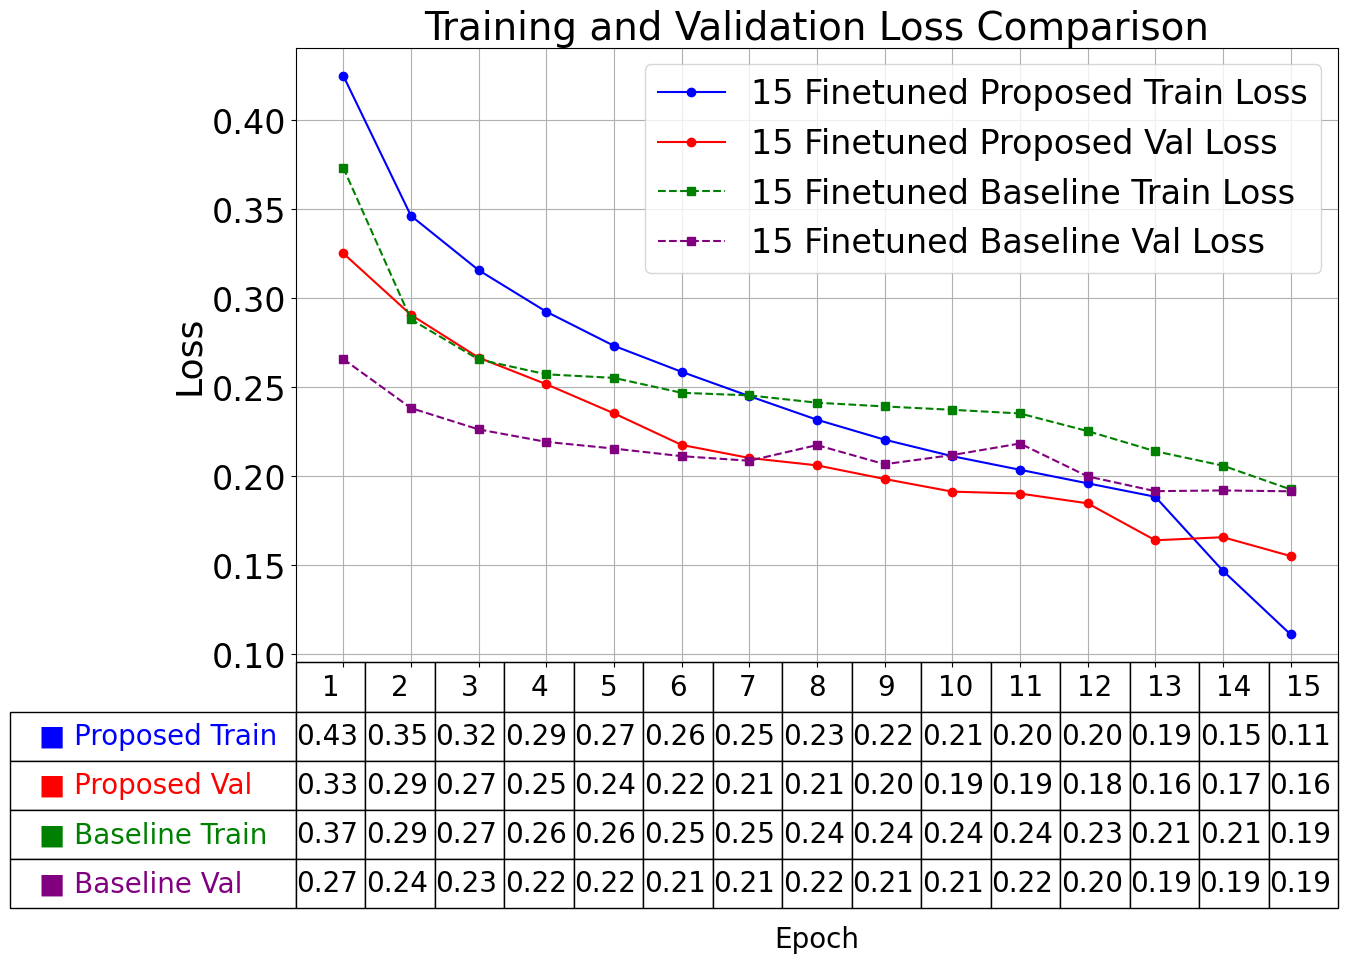

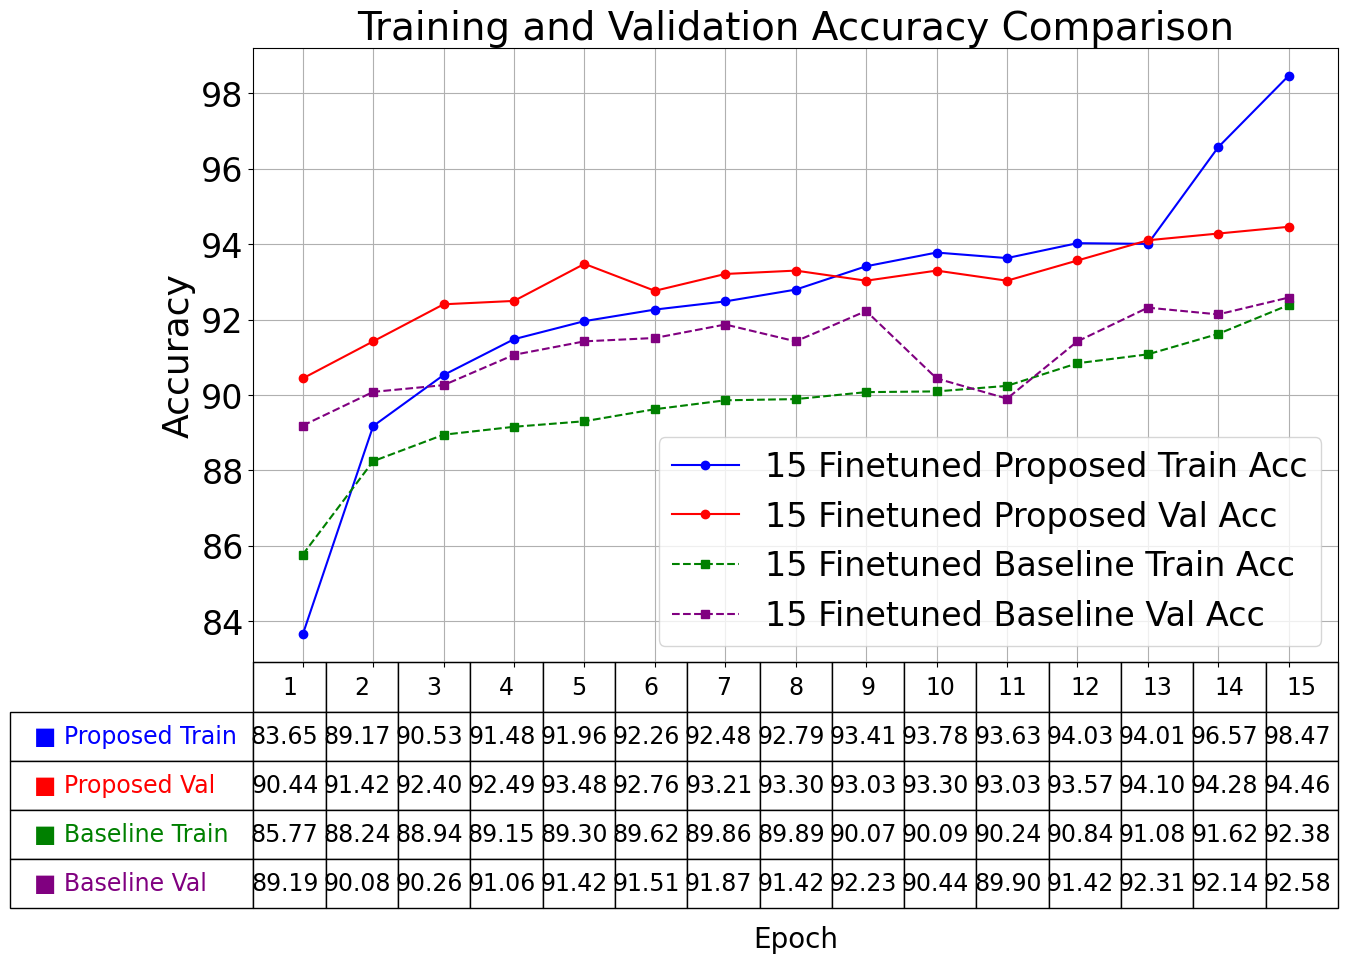

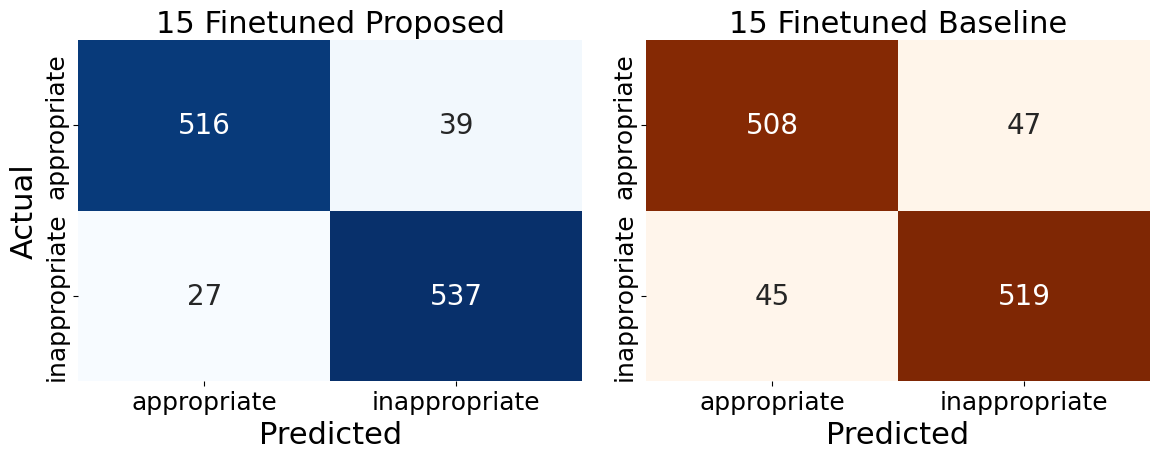

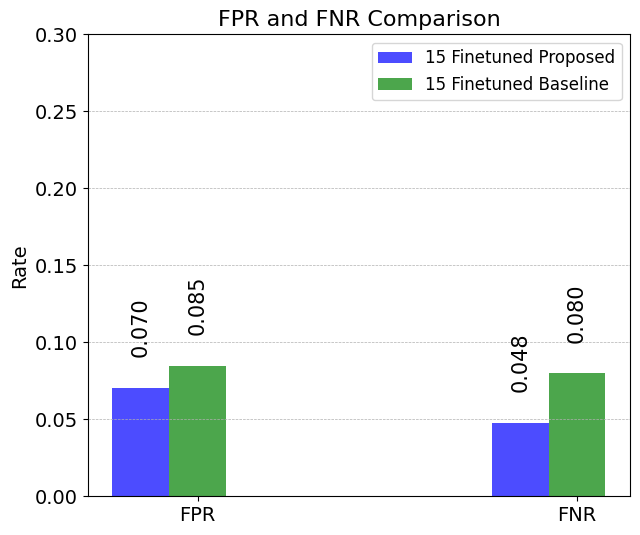

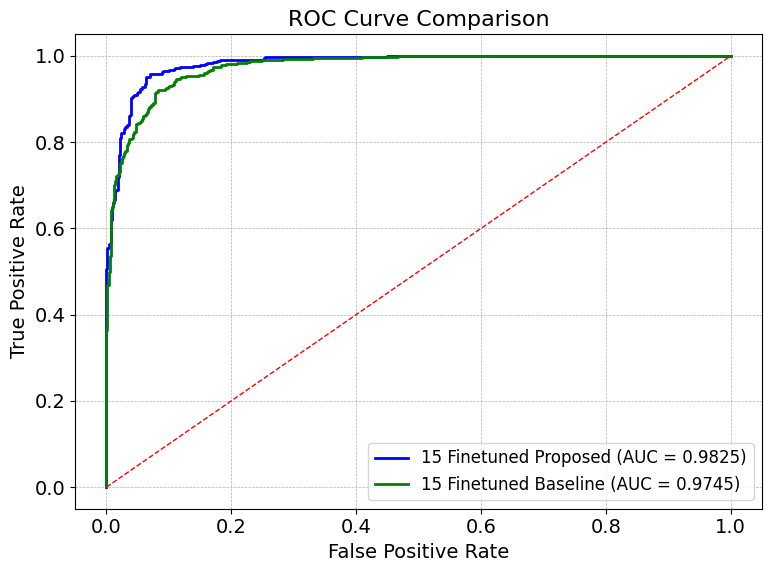

In [ ]:
with open("FINETUNING/Proposed/fixedproposed_classification_report15epochs_finetune4.txt", "r") as file:
    reports = file.read()
print(reports)

with open("FINETUNING/Proposed/fixedBaseline_classification_report15epochs_finetuneF.txt", "r") as file:
    reports = file.read()
print(reports)
# Assuming you have history dictionaries from two different models

# history_df = pd.read_csv('FINETUNING/Proposed/fixedsecond_training_history15epochs_finetune4.csv')
# Fsecondhistorye= {
#     'epoch': history_df['epoch'].tolist(),
#     'train_loss': history_df['train_loss'].tolist(),
#     'val_loss': history_df['val_loss'].tolist(),
#     'train_accuracy': history_df['train_accuracy'].tolist(),
#     'val_accuracy': history_df['val_accuracy'].tolist(),
# }

# history_df2 = pd.read_csv('FINETUNING/Baseline/fixedBaseline_training_history15epochs_finetuneF.csv')
# Fsecondhistorye2= {
#     'epoch': history_df2['epoch'].tolist(),
#     'train_loss': history_df2['train_loss'].tolist(),
#     'val_loss': history_df2['val_loss'].tolist(),
#     'train_accuracy': history_df2['train_accuracy'].tolist(),
#     'val_accuracy': history_df2['val_accuracy'].tolist(),
# }
# # plot_from_history(Fsecondhistorye)
# plot_from_history3(Fsecondhistorye, Fsecondhistorye2, "15 Finetuned Proposed", "15 Finetuned Baseline", save_as="15 epochs finetuned")

# metrics_df1= pd.read_csv('FINETUNING/Proposed/fixedcecond_training_metrics15epochs_finetune4.csv')
# # plot_metrics(metrics_dfs)
# metrics_df2= pd.read_csv('FINETUNING/Baseline/fixedBaseline_training_metrics15epochs_finetuneF.csv')

# metrics_df3= pd.read_csv('MMU TRAINING/Baseline/fixedBaseline_training_metrics15epochsMMU.csv')
# metrics_df4= pd.read_csv('MMU TRAINING/Baseline/fixedBaseline_training_metrics15epochsMMU_noaug.csv')


# plot_metrics_many(metrics_df1, metrics_df2, model_names=["15 Finetuned Proposed", "15 Finetuned Baseline", "15 Baseline Aug","15 Baseline Non-Aug"], save_as="15 epochs Proposed vs Baseline Finetuned") 

### Read Baseline


              precision    recall  f1-score   support

           0    0.75510   0.89516   0.81919       124
           1    0.84524   0.66355   0.74346       107

    accuracy                        0.78788       231
   macro avg    0.80017   0.77936   0.78132       231
weighted avg    0.79685   0.78788   0.78411       231

Accuracy Score: 0.7878787878787878

              precision    recall  f1-score   support

           0    0.71338   0.90323   0.79715       124
           1    0.83784   0.57944   0.68508       107

    accuracy                        0.75325       231
   macro avg    0.77561   0.74133   0.74112       231
weighted avg    0.77103   0.75325   0.74524       231

Accuracy Score: 0.7532467532467533



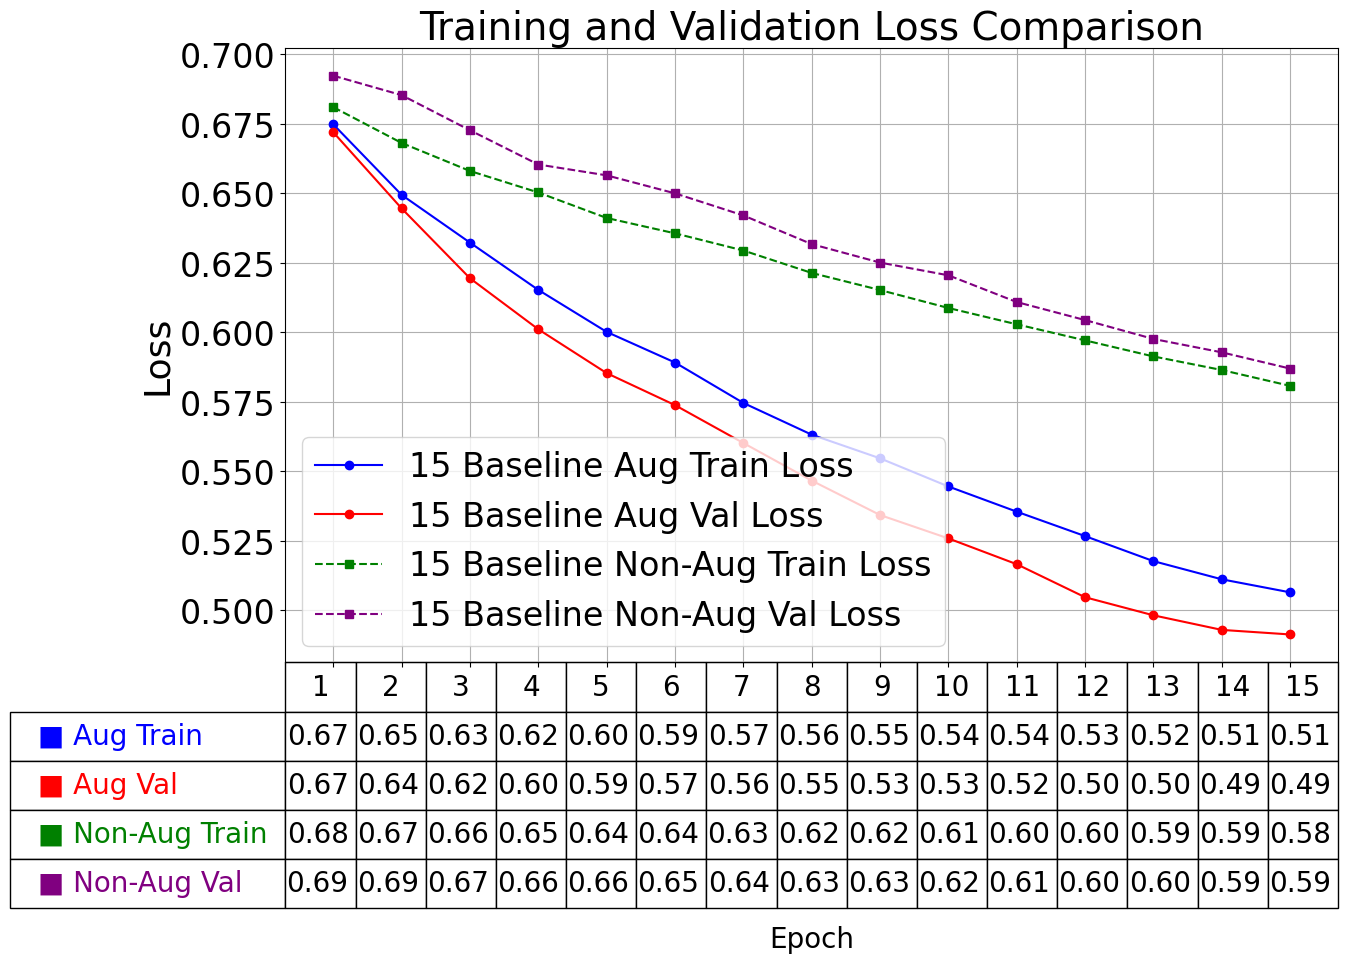

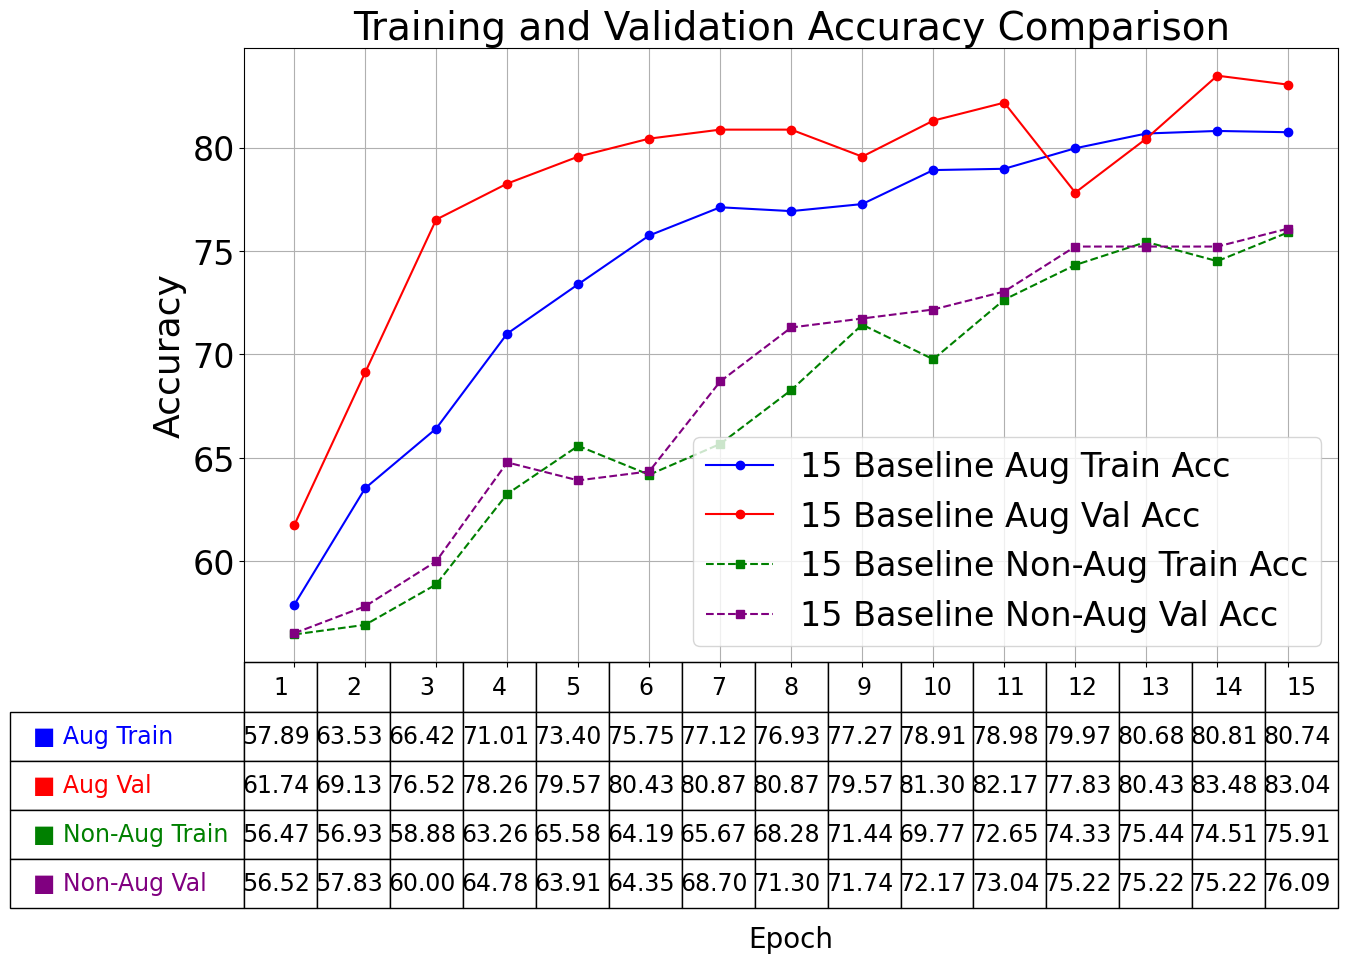

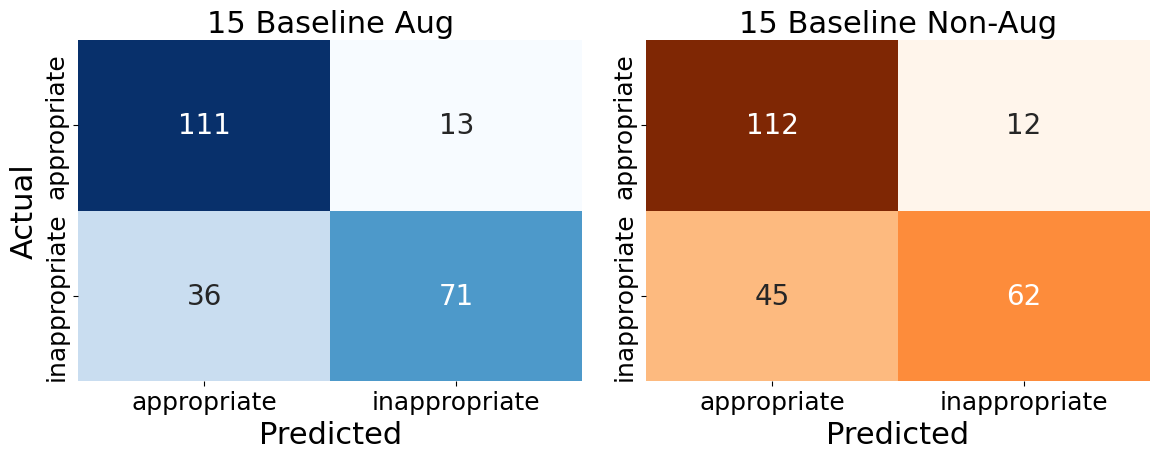

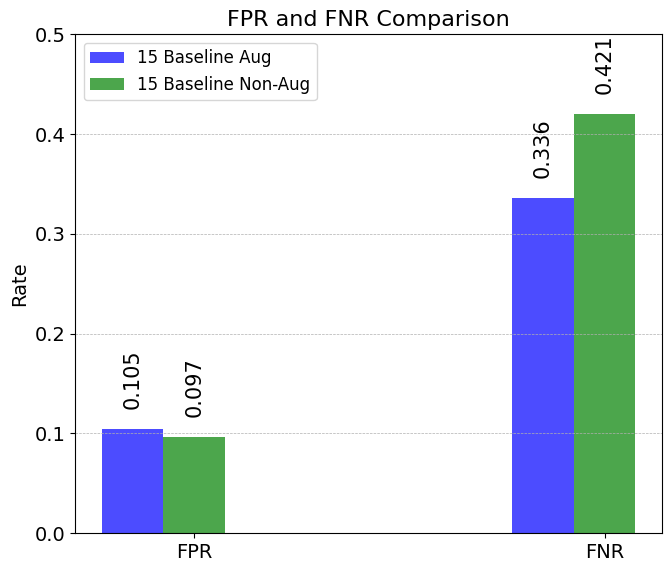

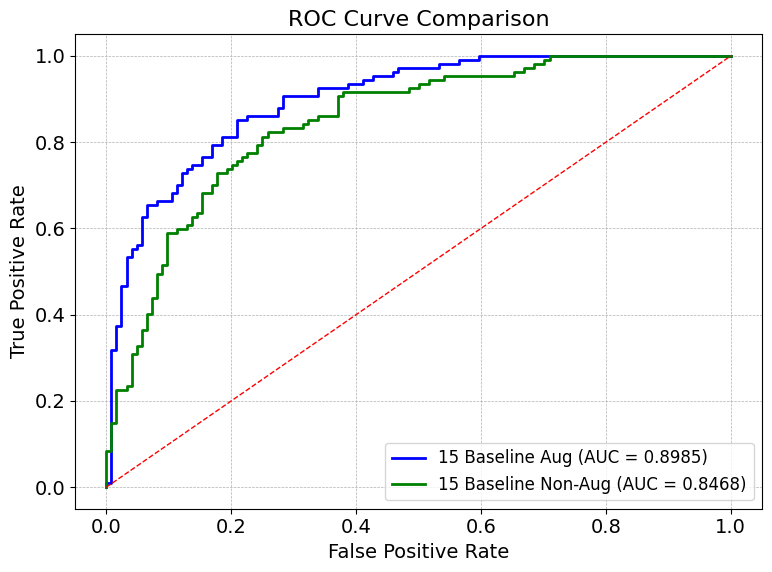

In [48]:
with open("MMU TRAINING/Baseline/fixedBaseline_classification_report15epochsMMU.txt", "r") as file:
    reports = file.read()

print(reports)

with open("MMU TRAINING/Baseline/fixedBaseline_classification_report15epochsMMU_noaug.txt", "r") as file:
    reports = file.read()

print(reports)
# Assuming you have history dictionaries from two different models

history_df = pd.read_csv('MMU TRAINING/Baseline/fixedBaseline_training_history15epochsMMU.csv')
Fsecondhistorye= {
    'epoch': history_df['epoch'].tolist(),
    'train_loss': history_df['train_loss'].tolist(),
    'val_loss': history_df['val_loss'].tolist(),
    'train_accuracy': history_df['train_accuracy'].tolist(),
    'val_accuracy': history_df['val_accuracy'].tolist(),
}

history_df2 = pd.read_csv('MMU TRAINING/Baseline/fixedBaseline_training_history15epochsMMU_noaug.csv')
Fsecondhistorye2= {
    'epoch': history_df2['epoch'].tolist(),
    'train_loss': history_df2['train_loss'].tolist(),
    'val_loss': history_df2['val_loss'].tolist(),
    'train_accuracy': history_df2['train_accuracy'].tolist(),
    'val_accuracy': history_df2['val_accuracy'].tolist(),
}
# plot_from_history(Fsecondhistorye)
plot_from_history3(Fsecondhistorye, Fsecondhistorye2, "15 Baseline Aug", "15 Baseline Non-Aug", save_as="15 epochs Baseline MMU")

# metrics_df1= pd.read_csv('Training Merge/proposed_ECD_aug_dense_5epochs_metrics.csv')
# # plot_metrics(metrics_dfs)

# metrics_df2= pd.read_csv('Training Merge/fixedcecond_training_metrics5epochs_ECD_no_aug_dense.csv')
metrics_df3= pd.read_csv('MMU TRAINING/Baseline/fixedBaseline_training_metrics15epochsMMU.csv')
metrics_df4= pd.read_csv('MMU TRAINING/Baseline/fixedBaseline_training_metrics15epochsMMU_noaug.csv')


plot_metrics_many_baseline(metrics_df3, metrics_df4, model_names=["15 Baseline Aug", "15 Baseline Non-Aug", "15 Baseline Aug","15 Baseline Non-Aug"], save_as="15 epochs Baseline MMU")